In [ ]:
#| hide
#|eval: false
# This is to render Plotly plots into HTML
# For more information, see https://quarto.org/docs/interactive/widgets/jupyter.html#plotly
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

import warnings
warnings.simplefilter('ignore')

import logging
logging.getLogger('statsforecast').setLevel(logging.ERROR)


# Nixtla - ML Forecast

> [Nixtla - ML Forecast](https://nixtla.github.io/mlforecast/distributed.models.spark.lgb.html)


- skip_showdoc: true
- skip_exec: true

In [ ]:
#| default_exp nixtla

In [ ]:
import pandas as pd
from statsforecast import StatsForecast



In [ ]:
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv', parse_dates=['ds'])
df.head()


,unique_id,ds,y
0,AirPassengers,1949-01-01,112
1,AirPassengers,1949-02-01,118
2,AirPassengers,1949-03-01,132
3,AirPassengers,1949-04-01,129
4,AirPassengers,1949-05-01,121


In [ ]:
df['unique_id'].value_counts()


unique_id
AirPassengers    144
Name: count, dtype: int64

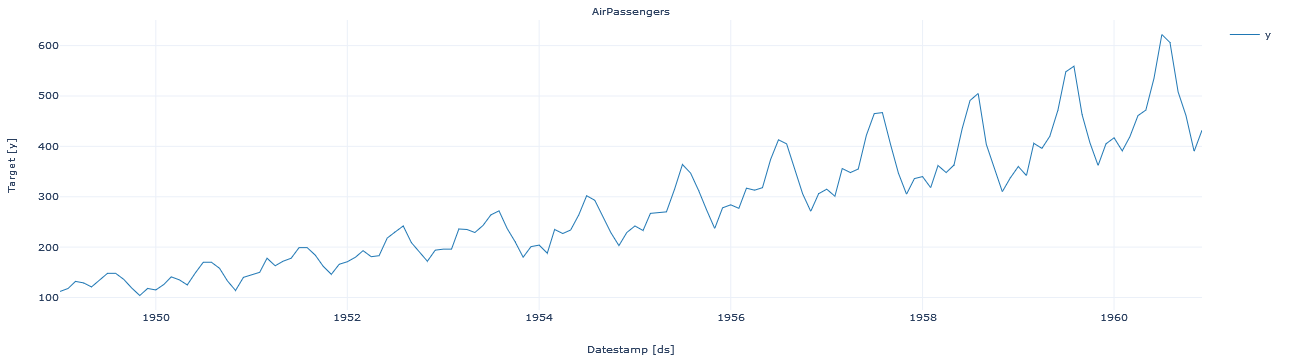

In [ ]:
StatsForecast.plot(df, engine='plotly')

In [ ]:
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from sklearn.linear_model import LinearRegression


In [ ]:
fcst = MLForecast(
    models=LinearRegression(),
    freq='MS',  # our serie has a monthly frequency
    lags=[12],
    target_transforms=[Differences([1])],
)

In [ ]:
fcst.fit(df)

MLForecast(models=[LinearRegression], freq=<MonthBegin>, lag_features=['lag12'], date_features=[], num_threads=1)

In [ ]:
preds = fcst.predict(12)
preds


,unique_id,ds,LinearRegression
0,AirPassengers,1961-01-01,444.656555
1,AirPassengers,1961-02-01,417.470764
2,AirPassengers,1961-03-01,446.903076
3,AirPassengers,1961-04-01,491.014160
4,AirPassengers,1961-05-01,502.622253
5,AirPassengers,1961-06-01,568.751465
6,AirPassengers,1961-07-01,660.044312
7,AirPassengers,1961-08-01,643.343323
8,AirPassengers,1961-09-01,540.666748
9,AirPassengers,1961-10-01,491.462799


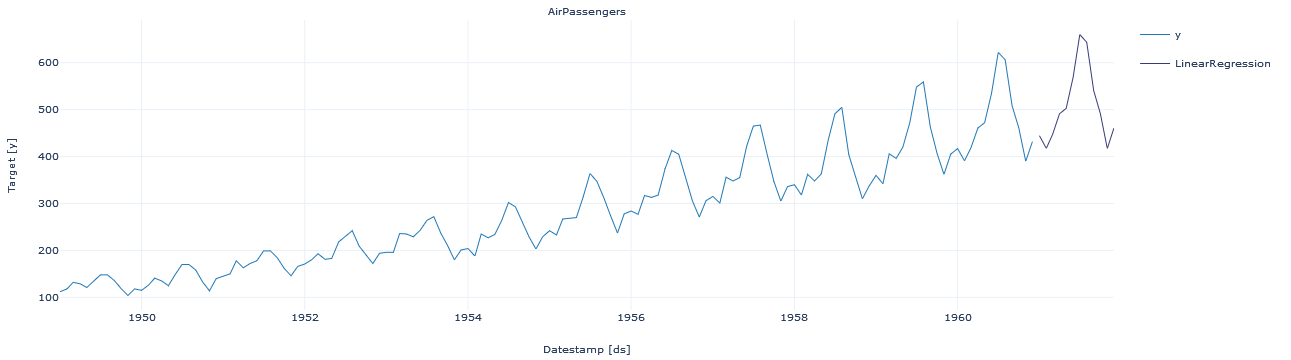

In [ ]:
StatsForecast.plot(df, preds, engine='plotly')